In [31]:
import networkx as nx
import numpy as np
import networkit as nk
from graph_utils import visualisation
import random

In [32]:
def permute_graph(graph: nk.Graph) -> nk.Graph:
    n = graph.numberOfNodes()

    permutation = list(range(n))
    random.shuffle(permutation)

    mapping = dict(zip(range(n), permutation))
    graph_perm = nk.graph.Graph(n)

    for u in range(n):
        for v in graph.iterNeighbors(u):
             if u < v:
                graph_perm.addEdge(mapping[u], mapping[v])


    return graph_perm

In [33]:
from graph_utils.reading import read_graph6

number_of_nodes = 9
graph_reader = read_graph6(f"raw_datasets/graph{number_of_nodes}c.g6")

In [34]:
from descriptors.edge_descriptors import jaccard_index, edge_betweenness, local_degree_score
from descriptors.node_descriptors import local_degree_profile
from descriptors.embeddings import create_embedding_function
import xxhash

embedding_fun = create_embedding_function(["moltop"], 81, histogram_range=(0, 1))

In [35]:
from collections import defaultdict

collisions: dict[str, list[int]] = {}
hashes: dict[str, int] = {}

In [36]:
for graph_id, graph in enumerate(graph_reader):
    if graph_id % 2000 == 0:
        print(graph_id)

    embedding = embedding_fun(graph)
    h = xxhash.xxh128_hexdigest(embedding.tobytes())

    if h not in hashes:
        hashes[h] = graph_id
    else:
        if h in collisions:
            collisions[h].append(graph_id)
        else:
            collisions[h] = [hashes[h], graph_id]

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
190000
192000
194000
196000
198000
200000
202000
204000
206000
208000
210000
212000
214000
216000
218000
220000
222000
224000
226000
228000
230000
232000
234000
236000
238000
240000
242000
244000
246000
248000
250000
252000
254000
256000
258000
260000


In [37]:
problematic_ids = set(graph_id for graphs in collisions.values() for graph_id in graphs)

for key, item in collisions.items():
    print(f"{key}: {item}")

1684670939be31fd423b8f2198c06d18: [114466, 114981]
2dd8e80664a9bdd5c2284fb535515cb3: [133006, 186132]
d7bcb213750d2e9a4d1053e010d47b15: [202304, 202368]
13ec4d7684e45a696f4c42d75aa4a0cb: [207472, 207863]
c2b4a127c1b09af840850eabb378f249: [244513, 244515]
dedc4fed723d8d5ae2c22c4e36bc98bf: [243804, 245118]
883a6628d6b3c15a98a782d317f8c6fb: [248107, 248112]
24ebc02a3e422b5e3d4cf5b57b0c6d85: [251375, 251580]
4f9765c48512ddf2757d2f077f245c72: [254214, 254246]
e18b5ea8e0a416b6fa2a9e4f43694826: [252078, 254636]
eb041401b0035d8e8a910a00e1c19b29: [254527, 255280]
024da96cc7187c4376e541bed00ab72f: [255477, 255484]
da3b98380b248902800a502469a8574f: [254651, 260032]
0dd9d92a50ca186be62d7a3712a14215: [260429, 260446]
e64c73580f8f1ced854bc15d42b9ee52: [260478, 260479]
2ed8e20d447639c5ccf26e26f236eb0c: [260480, 260484]
8457d88f894dd85def14594fe8c4f10f: [260813, 260934]
75d2ee1fe302a2286a2255d5f682215a: [261015, 261016]


In [38]:
problematic_graphs = {}

for graph_id, graph in enumerate(read_graph6(f"raw_datasets/graph{number_of_nodes}c.g6")):
    if graph_id in problematic_ids:
        problematic_graphs[graph_id] = graph

In [39]:
graph_collisions = {
    graph_hash: [problematic_graphs[graph_id] for graph_id in graph_ids] for graph_hash, graph_ids in collisions.items()
}

In [40]:
import matplotlib.pyplot as plt
for graph_hash, graphs in graph_collisions.items():
    print(graph_hash)

    last_embedding = None
    for graph in graphs:
        embedding = embedding_fun(graph)
        if last_embedding is not None:
            print((embedding == last_embedding).all())
        last_embedding = embedding
       

1684670939be31fd423b8f2198c06d18
True
2dd8e80664a9bdd5c2284fb535515cb3
True
d7bcb213750d2e9a4d1053e010d47b15
True
13ec4d7684e45a696f4c42d75aa4a0cb
True
c2b4a127c1b09af840850eabb378f249
True
dedc4fed723d8d5ae2c22c4e36bc98bf
True
883a6628d6b3c15a98a782d317f8c6fb
True
24ebc02a3e422b5e3d4cf5b57b0c6d85
True
4f9765c48512ddf2757d2f077f245c72
True
e18b5ea8e0a416b6fa2a9e4f43694826
True
eb041401b0035d8e8a910a00e1c19b29
True
024da96cc7187c4376e541bed00ab72f
True
da3b98380b248902800a502469a8574f
True
0dd9d92a50ca186be62d7a3712a14215
True
e64c73580f8f1ced854bc15d42b9ee52
True
2ed8e20d447639c5ccf26e26f236eb0c
True
8457d88f894dd85def14594fe8c4f10f
True
75d2ee1fe302a2286a2255d5f682215a
True


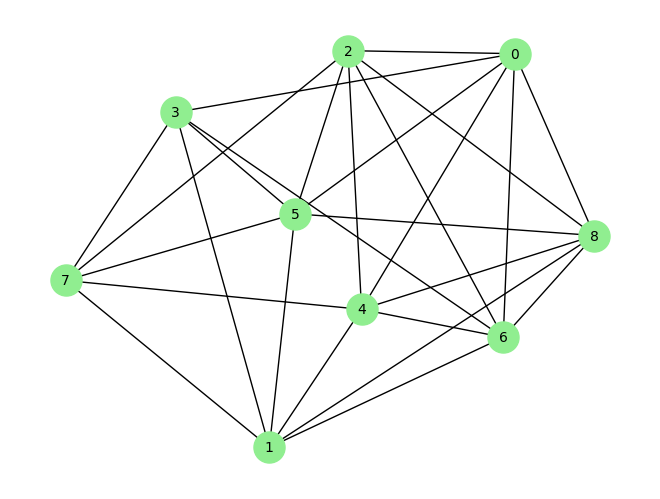

In [41]:
visualisation.plot_graph(graphs[0])

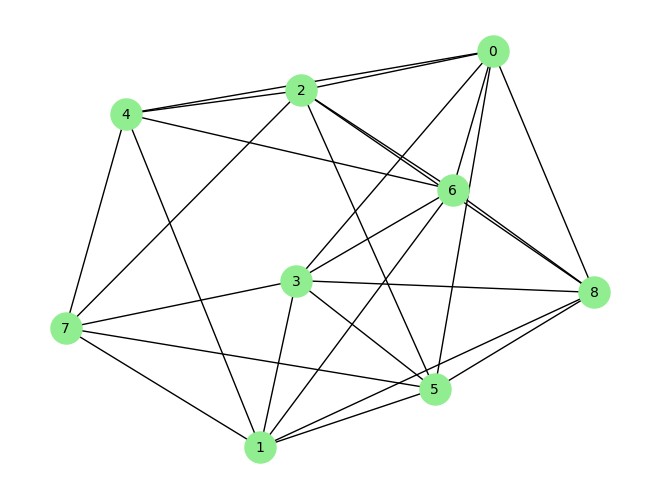

In [42]:
visualisation.plot_graph(graphs[1])